# 2018-04-30 - Test de CHAMP
Après l'install de la librairie, on importe :

In [2]:
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData
from CHAMP.Monitor import DisplayDico
import os

datapath = "CHAMP_datasets"

### Test import et preprocess
La base de visage d'AT&T, pas téléchargeable directement dans le code de CHAMP. Il faut la [télécharger](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html) et supprimer le readme dans les fichiers.

Size= torch.Size([1, 400, 1, 65, 65])


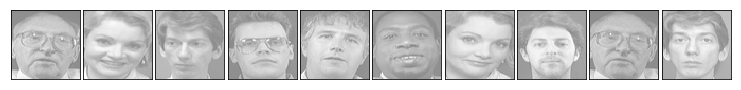

In [12]:
path = os.path.join(datapath, 'DB_face')

TrSet, TeSet = LoadData(name = 'Face', data_path =path, decorrelate=False, resize=(65, 65), download = True)
to_display = TrSet[0][0, 0:10, :, :, :] #displays 10 faces

print('Size=', TrSet[0].shape)
DisplayDico(to_display)

Champ supporte les normalisation de contrastes, en global et en local et les filtres gaussiens :

Local normalization
Gaussian filtered


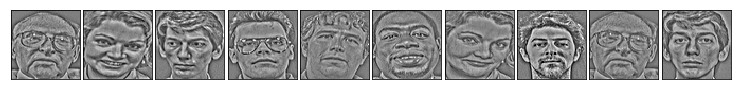

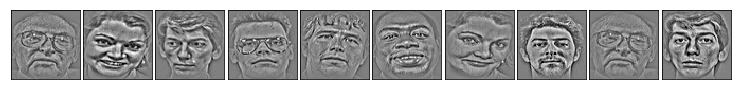

In [15]:
Normalized_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
to_display = Normalized_TrSet[0][0, 0:10, :, :, :]
print("Local normalization")
DisplayDico(to_display)

Filtered_L_TrSet = FilterInputData(
    Normalized_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
print("Gaussian filtered")
DisplayDico(to_display)

On peut aussi utiliser MNIST, CIFAR10 et STL10

Files already downloaded and verified
Files already downloaded and verified
Size= torch.Size([1, 50000, 1, 32, 32])


RuntimeError: $ Torch: not enough memory: you tried to allocate 15GB. Buy new RAM! at /opt/conda/conda-bld/pytorch-cpu_1518282373170/work/torch/lib/TH/THGeneral.c:253

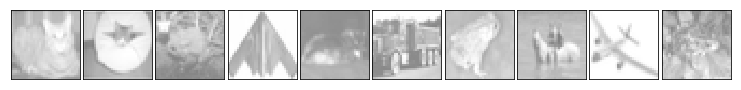

In [17]:
path = os.path.join(datapath, 'DB_CIFAR10')

TrSet, TeSet = LoadData('CIFAR', data_path=path, download = True)
to_display = TrSet[0][0, 0:10, :, :, :]

print('Size=', TrSet[0].shape)
DisplayDico(to_display)

#mange 15 go de ram
Normalized_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
to_display = Normalized_TrSet[0][0, 0:10, :, :, :]
print("Local normalization")
DisplayDico(to_display)

Filtered_L_TrSet = FilterInputData(
    Normalized_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
print("Gaussian filtered")
DisplayDico(to_display)


### Convolution à un layer 
Apparament le deuxième ne marche pas ? On importe et on filtre :

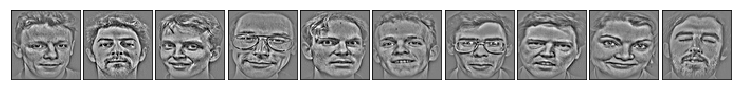

In [22]:
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

path = os.path.join(datapath, "DB_face")

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))

N_TrSet, _, _, _ = LocalContrastNormalization(TrSet) #normalized
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15) #gaussianed

to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

On entraine le réseau (5 mn/200 epochs sur une 1080) :

In [23]:
# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 30
# Learning Parameters
eta = .05
nb_epoch = 500

L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                 dico_size=dico_size, verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

KeyboardInterrupt: 